# <a href="https://mipt-stats.gitlab.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 2

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

%matplotlib inline

Для выполнения задания вы можете установить свою палитру цветов при отрисовке графиков с помощью кода ниже. Если введете несуществующее имя, то вам напечатается список возможных палитр. Также вы можете устанавливать свои цвета конкретным объектам на графиках, обычно это делается с помощью аргумента `color`.

In [108]:
sns.set_palette('Set2')

### Задача 1

**Профиль физика (+профиль химия)**

Скачайте <a href="https://www.kaggle.com/fedesoriano/cern-electron-collision-data
">датасет</a> с данными о столкновении электронов на Большом Адронном Коллайдере. 

Данный датасет  содержит информацию о событиях столкновения двух электронов. Он состоит из таблицы различных параметров столкновений. Каждая строка соответствует одному столкновению, каждый столбец соответствует одному параметру. Например, в столбцах E1, E2 записаны значения энергии сталкивающихся электронов, в столбцах px1, py1, pz1, px2, py2, pz2 — значения моментов импульса, в столбцах Q1, Q2 $-$ заряды электронов.

Для исследования рекомендуется выбрать столбцы 'E2', 'px2', 'eta2', 'phi2'. Все эти столбцы — некоторые параметры второго электрона. Можно взять и другие столбцы.

**Профиль педагогика**

Скачайте <a href="https://www.kaggle.com/spscientist/students-performance-in-exams
">датасет</a> с данными о результатах учащихся на экзаменах.

Данный датасет состоит из таблицы баллов учащихся на экзаменах по математике, чтению и письму, а также дополнительной информации о студентах. Каждая строка соответствует одному учащемуся, каждый столбец соответствует одному признаку. В столбцах math score, reading score и writing score записаны баллы за экзамены.

Для исследования возьмите столбцы 'math score', 'reading score', 'writing score'.

In [5]:
# эта функция читает данные, в кавычках укажите путь к файлу на вашем компьютере или в Colab
df = pd.read_csv("dielectron.csv")
#df = pd.read_csv("./dielectron.csv")
#df = pd.read_csv("./StudentsPerformance.csv")

Посмотрим на первые строки этой таблицы.

In [6]:
df.head()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,8.94841
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,15.89300
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,38.38770
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,3.72862
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,2.74718


Выберите несколько (3-6) столбцов для анализа значений в них.

In [7]:
# укажите столбцы данных 
# Пример: columns = ['math score', ...]
columns = ['E2', 'px2', 'eta2', 'phi2']

df_chosen_columns = df[columns]

#Одномерный массив значений одного признака (например, 'math score') можно получить так:
#df_chosen_columns['math score']

#### Гистограммы

Для каждого из выбранных признаков нарисуйте гистограмму распределения. Для этого воспользуйтесь функцией `plt.hist`.

*Примечание.* В анализе данных обычно используется слово "признак" для обозначения исследуемого свойства объекта. Например, для биологического датасета признаком является белок.


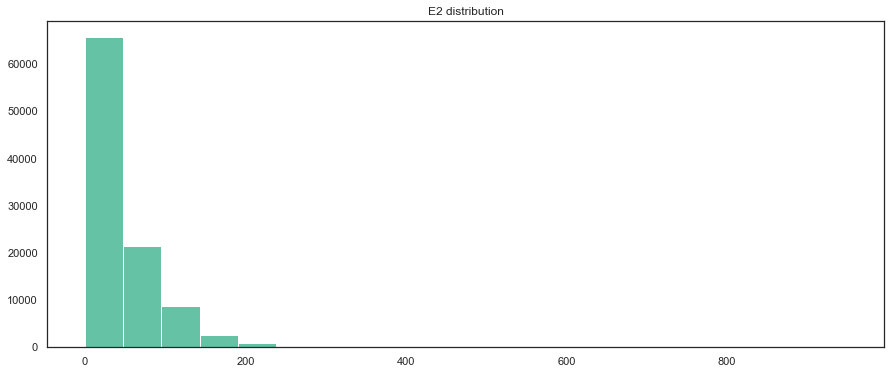

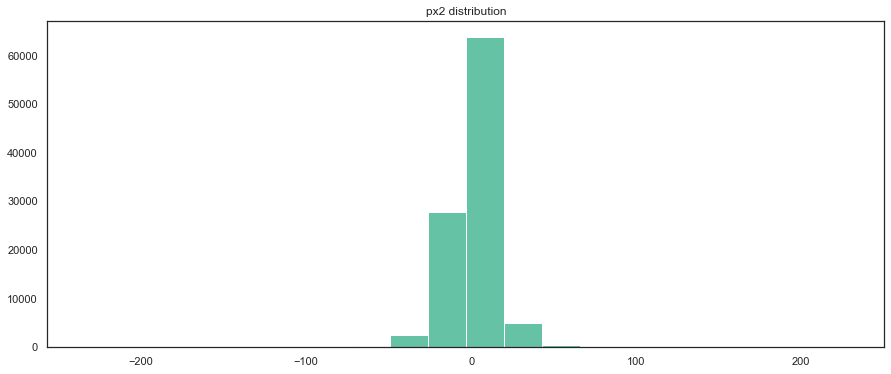

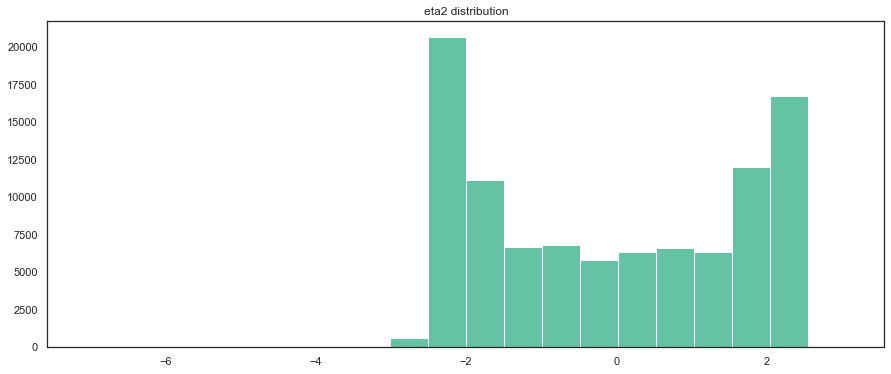

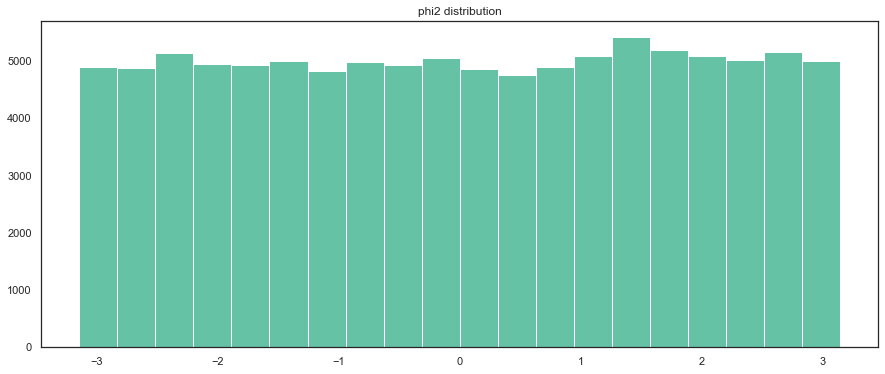

In [109]:
for i, column in enumerate(columns):
    plt.figure(figsize=(15, 6))
    
    plt.hist(df_chosen_columns[column], bins=20, alpha=1)
    plt.title(column + ' distribution');

Выбросы — значения, которые сильно отличаются от большинства значений выборки. Они могут возникать из-за ошибки измерения, из-за необычной природы входных данных, но также могут быть и частью распределения.

По гистограммам предположите, в каких из исследуемых признаков могут быть выбросы?

**Ответ:** E2, px2, eta2

Выбросы могут сильно портить внешний вид графика.

Продемонстрируем это на примере. Сгенерируем выборку размера 1000 из стандартного нормального распределения и построим по ней гистограмму. В библиотеке `scipy` это можно сделать с помощью метода `rvs`

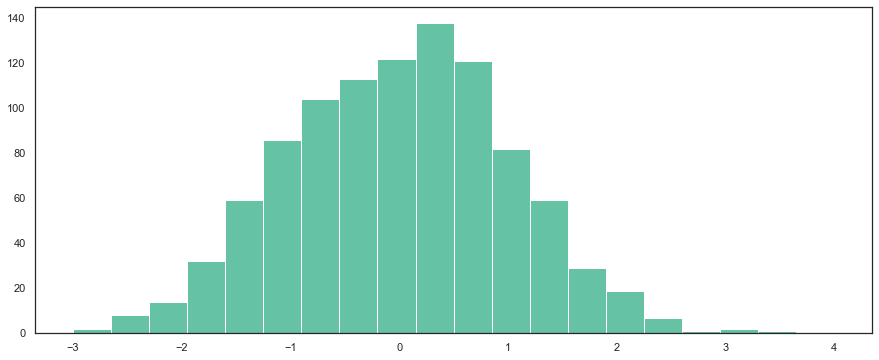

In [110]:
sample = sps.norm.rvs(size=1000)

plt.figure(figsize=(15, 6))
plt.hist(sample, bins=20, range=(-3, 4));

Как видим, большая часть значений находятся в промежутке от -3 до 3.

Теперь добавим выброс — очень большое значение, которое могло появиться, например, в результате ошибок измерения. Допустим, что выброс — первое измерение.

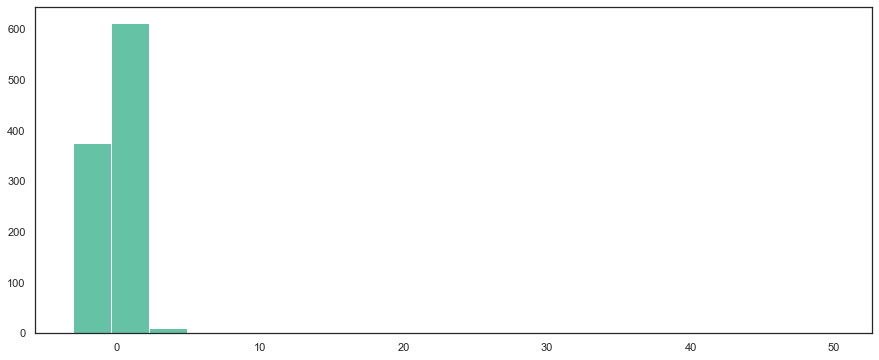

In [111]:
outlier = 50
sample[0] = outlier

plt.figure(figsize=(15, 6))
plt.hist(sample, bins=20);

По такому графику уже нельзя сделать предположение о распределении выборки.
Также обратите внимание, что большая часть графика пустая, что говорит о неинформативности данного графика.

Эту проблему с графиками можно решить с помощью параметра `range`, который определяет, в каких границах строится гистограмма.

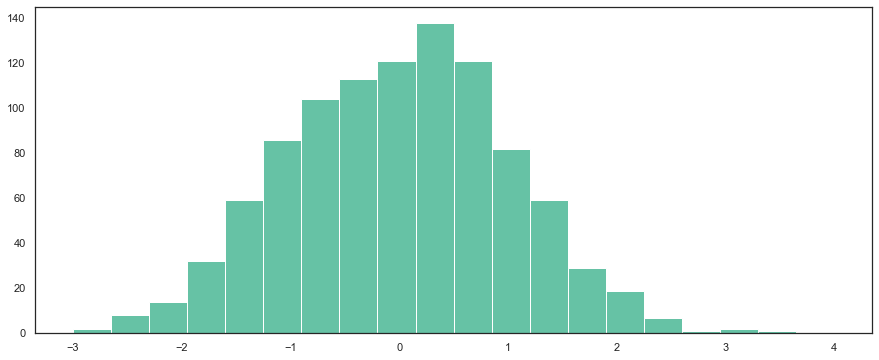

In [112]:
plt.figure(figsize=(15, 6))
plt.hist(sample, bins=20, range=(-3, 4));

Проделайте то же самое с теми столбцам, в которых, как вы считаете, есть выбросы.

В словаре `ranges_without_outliers` укажите, в каких пределах, по вашему мнению, стоит нарисовать гистограмму распределения для каждого признака.

Пример заполнения словаря на ячейке ниже. 

Здесь мы считаем, что для признака `column1` большая часть значений находится в промежутке от -1 до 5, а все значения за пределами этого промежутка — выбросы.
Мы хотим нарисовать информативный график для гистограммы значений признака `column1`, поэтому гистограмму будем строить только на основе значений из промежутка (-1, 5)

Аналогично для признака `column2`

In [ ]:
ranges_without_outliers_example = {
    'column1' : (-1, 5),
    'column2' : (0, 3)
}

Аналогично определите интервалы для исследуемых признаков

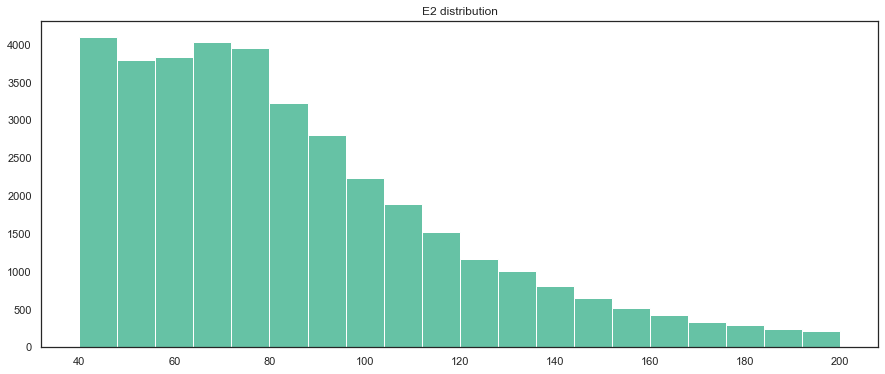

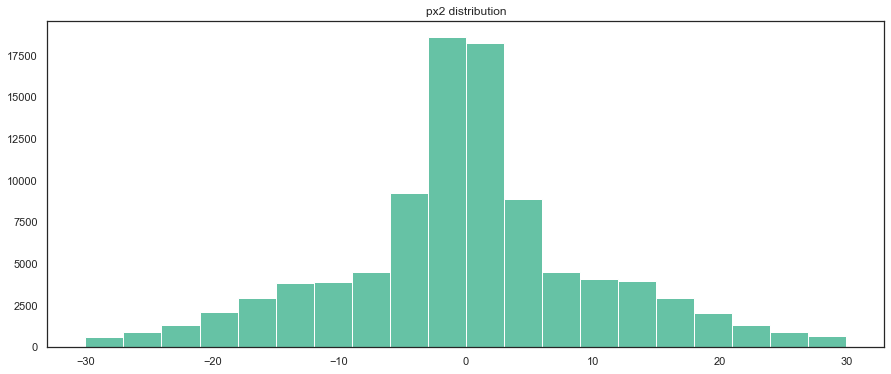

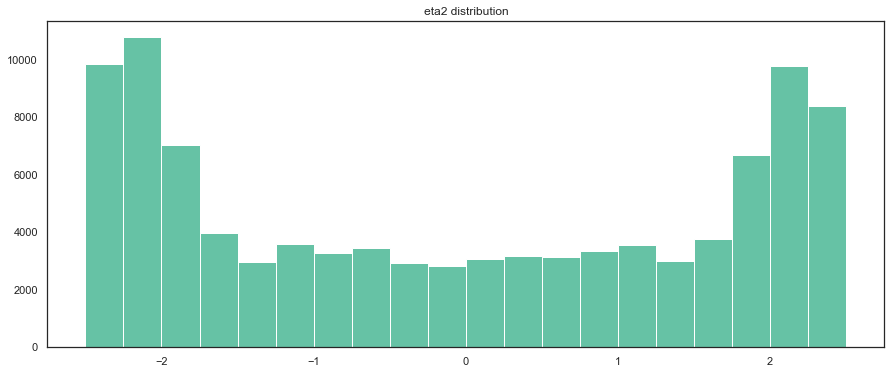

In [113]:
ranges_without_outliers = {
    'E2' : (40, 200),
    'px2' : (-30, 30),
    'eta2' : (-2.5, 2.5)
}


for column, column_range in ranges_without_outliers.items():
    plt.figure(figsize=(15, 6))
    plt.hist(df_chosen_columns[column], range=column_range, bins=20)
    plt.title(column + ' distribution')

**Сделайте выводы** 

Изменилась ли форма распределений, стали ли графики информативнее?

**Ответ:** Форма распределения изменилась только для eta2. Графики стали информативнее за исключением px2.

### Задача 2

В этой задаче нужно визуализировать *закон больших чисел* (обратите внимание на ноутбук "Простейший анализ данных").



Пусть $\xi_1, ..., \xi_n$ &mdash; независимые случайные величины из некоторого распределения, причем $\mathsf{E}\xi_i = a$. Тогда выполнена сходимость $$\frac{\xi_1 + ... + \xi_n}{n} \stackrel{п.н.}{\longrightarrow} a.$$ 

*Замечание 1.* Закон больших чисел имеет несколько формулировок. Данная формулировка часто называется *усиленным законом больших чисел*. В частности, усиленной она является, поскольку в отличии от "простой" версии она не требует условия на дисперсии и утверждает о более сильной сходимости "почти наверное".

*Замечание 2.* Последовательность случайных величин $\xi_1, \xi_2, ...$ сходится почти наверное к случайной величине $\xi$, если $\mathsf{P}\big(\big\{ \omega \in \Omega\:\big|\: \xi_n(\omega) \to \xi(\omega)\big\}\big) = 1$

---








Рассмотрим распределение Коши с плотностью
$$p(x)=\frac{1}{\pi(1+x^2)}$$
 
для  $x\in\mathbb{R}$
 , которое известно своими тяжелыми хвостами. Иначе говоря, плотность убывает медленно при  $x \to \infty$
 . Сравните, например, с нормальным или экспоненциальным распределениями. В частности, из-за этого у распределения Коши даже не существует математического ожидания.

За распределение Коши отвечает класс [`scipy.stats.cauchy`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html).



1. Визуализируйте на одном графики плотности нормального распределения и распределения Коши. Что можно сказать?



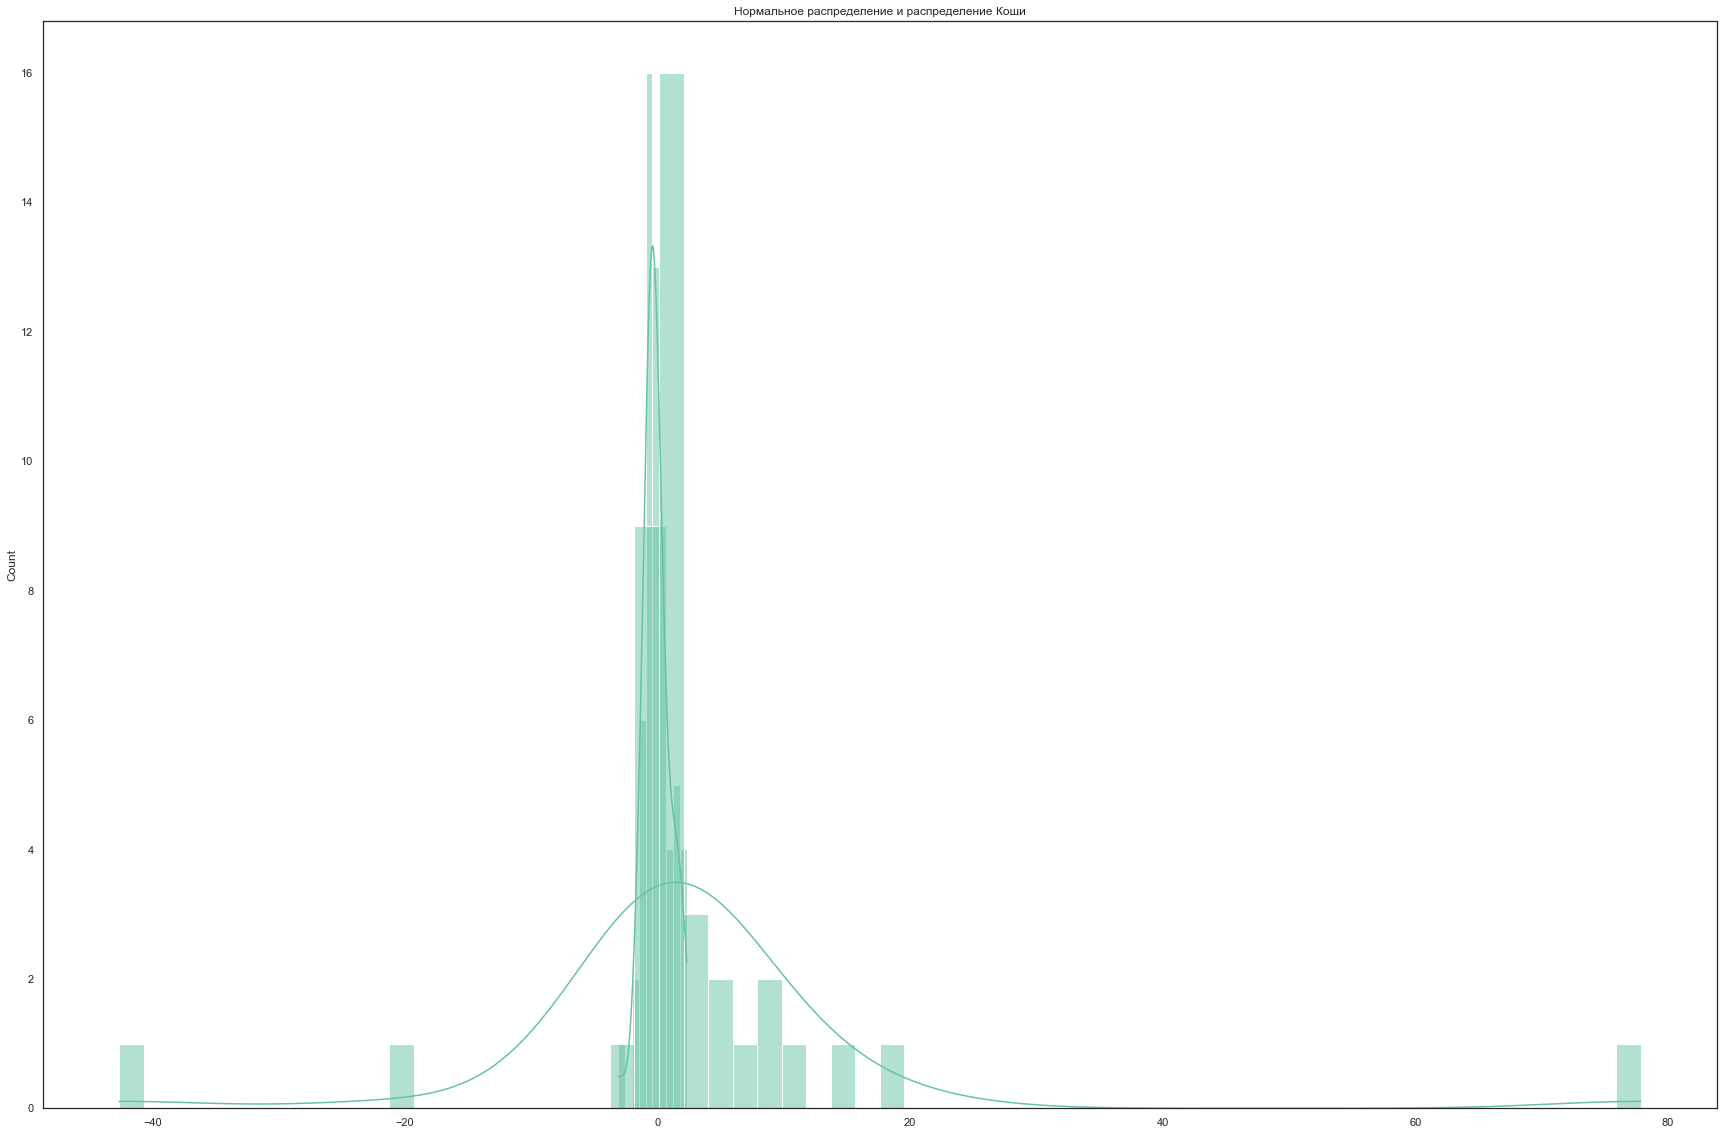

In [114]:
sample1 = sps.norm.rvs(size=60) 
sample2 = sps.cauchy.rvs(size=40)
plt.figure(figsize=(30, 20))
plt.title("Нормальное распределение и распределение Коши")

sns.histplot(data=sample1, kde=True)
sns.histplot(data=sample2, kde=True)
plt.show()

2. Повторите эксперимент с занятия про закон больших чисел для распределения Коши. Выполняется ли закон?



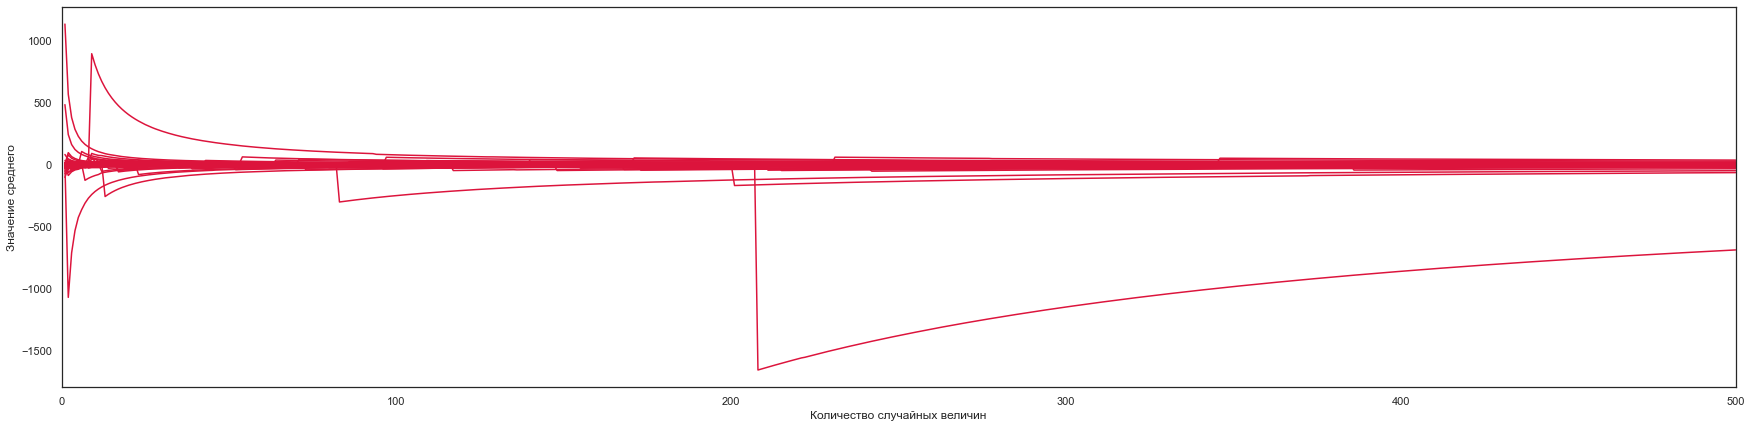

In [115]:
size = 500
samples_count = 500

sample = sps.cauchy.rvs(size=(samples_count, size))
means = sample.cumsum(axis=1) / (np.arange(size) + 1)

plt.figure(figsize=(30, 7))
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, means[i], color='crimson')
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size));

#Закон больших чисел не выполняется

3. Аналогичным образом проведите эксперимент по изучению зависимости выборочной медианы от размера выборки. Медиану по выборке можно посчитать с помощью [`np.median`](https://numpy.org/doc/stable/reference/generated/numpy.median.html).

In [94]:
size = 500
samples_count = 500

sample = sps.cauchy.rvs(size=(samples_count, size))
medians = np.zeros((500, 500))
for i in range(size):
    for j in range(1, samples_count):
        medians[i][j] = np.median(sample[i][:j])


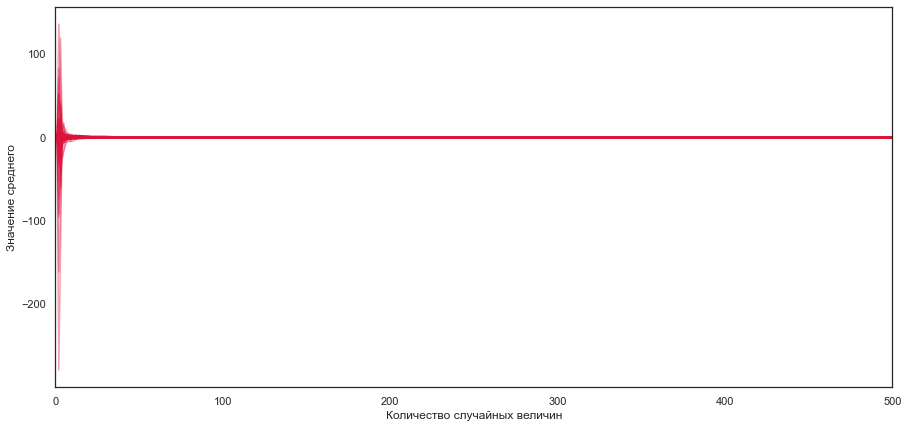

In [116]:

plt.figure(figsize=(15, 7))
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, medians[i], color='crimson', alpha=0.4)
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size));

### Задача 3

Постройте графики плотности для трех распределений: нормального, равномерного и эспоненциального. Вы можете пользоваться кодом из файла scipy.ipynb. Обязательно спользуйте метод `.pdf()`

#### 1. Нормальное распределение 

На одном рисунке постройте по 3 графика плотности <b>нормального</b> распределения, изменяя:

 - только параметр `scale` [1, 2, 0.25]
 - только параметр `loc` [-2, 0, 1]
 - одновременно изменяя и `scale` и `loc` [(1, 0), (1, 2), (2, 0)]

У вас должно получиться три картинки по три графика на каждой (не сетка графиков!).

Text(0.5, 1.0, 'Нормальное распределение варьирование scale и loc')

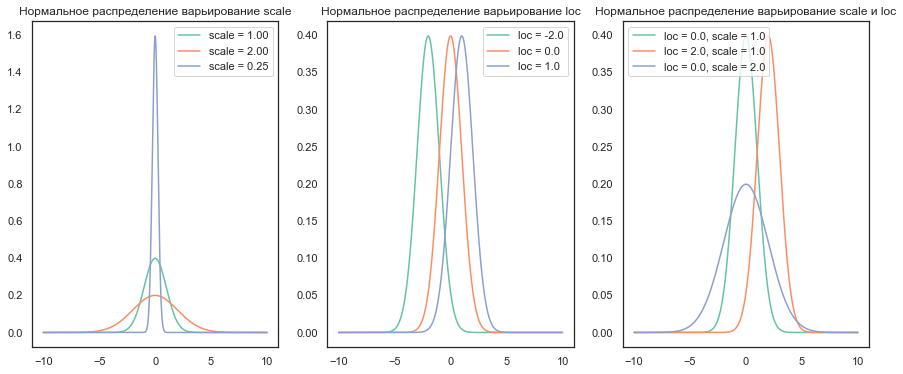

In [121]:
size = 1000
scale = [1, 2, 0.25]
loc = [-2, 0, 1]
scale_loc = [(1, 0), (1, 2), (2, 0)]

grid = np.linspace(-10, 10, size)
fig, ax = plt.subplots(1, 3, figsize=(15, 6))

for i in scale:
    ax[0].plot(grid, sps.norm(scale=i).pdf(grid), label='scale = {:.2f}'.format(i))
    ax[0].legend()
ax[0].set_title('Нормальное распределение варьирование scale')

for i in loc:
    ax[1].plot(grid, sps.norm(loc=i).pdf(grid), label='loc = {:.1f}'.format(i))
    ax[1].legend()
ax[1].set_title('Нормальное распределение варьирование loc')

for i in scale_loc:
    ax[2].plot(grid, sps.norm(loc=i[1], scale=i[0]).pdf(grid), \
                            label='loc = {:.1f}, scale = {:.1f}'.format(i[1], i[0]))
    ax[2].legend()
ax[2].set_title('Нормальное распределение варьирование scale и loc')

Плотность нормального распределения описывается следующей формулой:

$$ p(x) = \frac{1}{\sigma \sqrt{2 \pi}} exp \left( -\frac{(x-\mu)^2}{2 \sigma ^2}\right)$$

Как параметры `loc` и `scale` связаны с параметрами распределения $\mu$ и $\sigma$? (эту информацию можно найти в документации)


**Ответ:** Распределения в scipy кодируются общим способом с двумя параметрами location и scale, так что location - это параметр (loc), который сдвигает распределение влево или вправо, а scale - параметр, который сжимает или растягивает распределение. Loc - это матожидание(μ), scale - стандартное отклонение(σ).

Приведите примеры нормального распределения из жизни.

**Ответ:**  Рост человека, масса вылавливаемой рыбы одного вида, масса тела младенцев при рождении.

#### 2. Равномерное непрерывное распределение

На одном рисунке постройте по 3 графика плотности <b>равномерного непрерывного</b> распределения, изменяя:
 - только параметр `scale` [1, 2, 0.25]
 - только параметр `loc` [1, -2, 3]
 - одновременно изменяя и `scale` и `loc` [(1, 0), (1, 2), (2, 0)]

 У вас должно получиться три картинки по три графика на каждой (не сетка графиков!).

Text(0.5, 1.0, 'Равномерное распределение варьирование scale и loc')

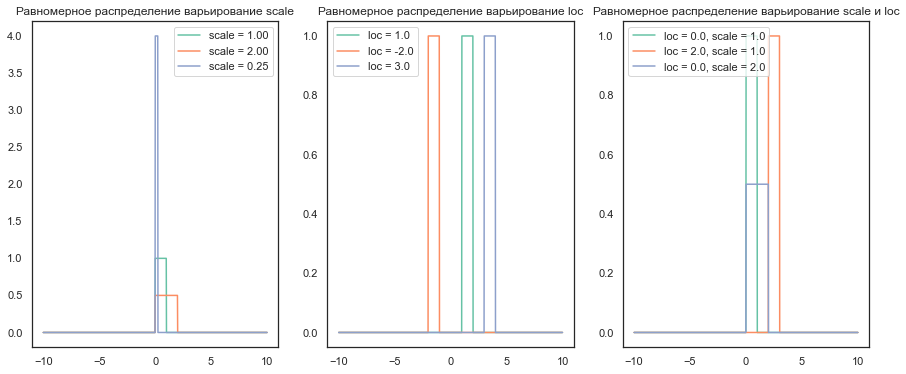

In [122]:
size = 1000
scale = [1, 2, 0.25]
loc = [1, -2, 3]
scale_loc = [(1, 0), (1, 2), (2, 0)]

grid = np.linspace(-10, 10, size)
fig, ax = plt.subplots(1, 3, figsize=(15, 6))

for i in scale:
    ax[0].plot(grid, sps.uniform(scale=i).pdf(grid), label='scale = {:.2f}'.format(i))
    ax[0].legend()
ax[0].set_title('Равномерное распределение варьирование scale')

for i in loc:
    ax[1].plot(grid, sps.uniform(loc=i).pdf(grid), label='loc = {:.1f}'.format(i))
    ax[1].legend()
ax[1].set_title('Равномерное распределение варьирование loc')

for i in scale_loc:
    ax[2].plot(grid, sps.uniform(loc=i[1], scale=i[0]).pdf(grid), \
                            label='loc = {:.1f}, scale = {:.1f}'.format(i[1], i[0]))
    ax[2].legend()
ax[2].set_title('Равномерное распределение варьирование scale и loc')

Плотность равномерного непрерывного распределения описывается следующей формулой:

$$p(x) = \frac{1}{b-a} I\{x\in [a, b]\}$$

Как параметры `loc` и `scale` связаны с параметрами распределения $a$ и $b$? (эту информацию можно найти в документации)


**Ответ:** loc = a, scale = b-a.

Приведите примеры равномерного непрерывного распределения из жизни.

**Ответ:** Выпадение чисел на игральных костях, вероятность вытянуть определенную масть карты, вращение колеса (т. е. в какой точке остановится).

#### 3. Экспоненциальное распределение

На одном рисунке постройте по 3 графика плотности <b>экспоненциального</b> распределения, изменяя:
 - только параметр `scale` [1, 2, 0.25]
 - только параметр `loc` [-1, 0, 2]
 - одновременно изменяя и `scale` и `loc` [(1, 0), (1, 2), (2, 0)]
 
 У вас должно получиться три картинки по три графика на каждой (не сетка графиков!).

Text(0.5, 1.0, 'Экспоненциальное распределение варьирование scale и loc')

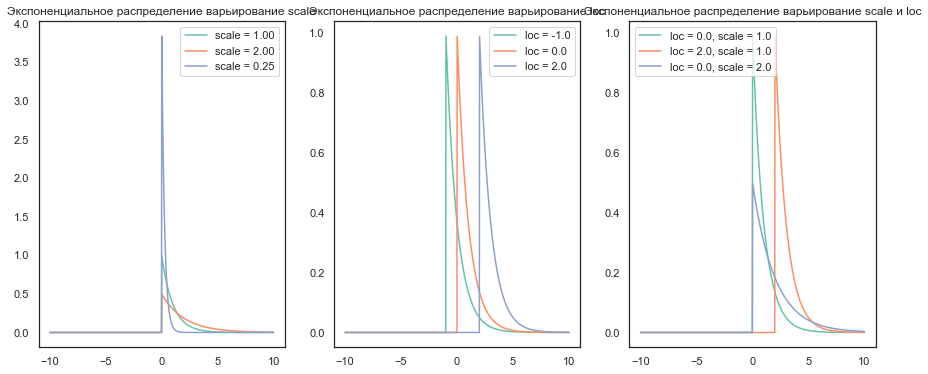

In [123]:
size = 1000
scale = [1, 2, 0.25]
loc = [-1, 0, 2]
scale_loc = [(1, 0), (1, 2), (2, 0)]

grid = np.linspace(-10, 10, size)
fig, ax = plt.subplots(1, 3, figsize=(15, 6))

for i in scale:
    ax[0].plot(grid, sps.expon(scale=i).pdf(grid), label='scale = {:.2f}'.format(i))
    ax[0].legend()
ax[0].set_title('Экспоненциальное распределение варьирование scale')

for i in loc:
    ax[1].plot(grid, sps.expon(loc=i).pdf(grid), label='loc = {:.1f}'.format(i))
    ax[1].legend()
ax[1].set_title('Экспоненциальное распределение варьирование loc')

for i in scale_loc:
    ax[2].plot(grid, sps.expon(loc=i[1], scale=i[0]).pdf(grid), \
                            label='loc = {:.1f}, scale = {:.1f}'.format(i[1], i[0]))
    ax[2].legend()
ax[2].set_title('Экспоненциальное распределение варьирование scale и loc')

Плотность экспоненциального распределения описывается следующей формулой:

$$p(x) = \lambda e^{\lambda x} I\{x>0\}$$

Как параметры `loc` и `scale` связаны с параметром распределения $\lambda$? (эту информацию можно найти в документации)


**Ответ:** scale = 1 / λ, loc явно не зависит, отвечает за сдвиг.

Приведите примеры экспоненциального распределения из жизни.

**Ответ:** время до приезда метро, время между покупками в «Пятерочке», срок эксплуатации какой-либо техники, время работы лампочки до перегорания.

### Задача 4

Создайте матрицу 10х10, каждый элемент которой равен сумме индексов этого элемента.  Используйте numpy.  Визуализируйте с помощью `plt.imshow()`.

**Запрещено использовать циклы и list comprehension.** 

*Подсказка:* можно использовать np.broadcast и изменение формы массива.

In [159]:
mat = np.arange(0, 10)
mat[:, None] + np.arange(0, 10)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
       [ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
       [ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       [ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
       [ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]])